In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
#plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))

from acquire import get_store_data, opsd_germany_daily
import prepare

<Figure size 936x504 with 0 Axes>

# Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

- ## For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split

### 1. Store item Demand Dataset

In [2]:
df = get_store_data()
df.head()

,sale_amount,sale_date,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [3]:
# Getting it prepped and date time set and indexed

df = prepare.prep_store_data(df)
df.head()

,quantity,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,sales_total
sale_date,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,10.92
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,218.40
2013-01-01 00:00:00+00:00,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,125.55
2013-01-01 00:00:00+00:00,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,453.60
2013-01-01 00:00:00+00:00,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,294.00


In [4]:
# Dropping some unnecessary columns
df = df.drop(columns=['sale_id','store_address','store_city','store_id','store_state','store_zipcode','item_brand','item_id','item_name','item_upc12','item_upc14'])
df.head()

,quantity,item_price,sales_total
sale_date,,,
2013-01-01 00:00:00+00:00,13.0,0.84,10.92
2013-01-01 00:00:00+00:00,26.0,8.40,218.40
2013-01-01 00:00:00+00:00,27.0,4.65,125.55
2013-01-01 00:00:00+00:00,54.0,8.40,453.60
2013-01-01 00:00:00+00:00,35.0,8.40,294.00


In [5]:
# resampling the df by day as as requested from the question
df = df.resample('D').sum()

# adding a year column
df['year'] = df.index.year

df.tail()

,quantity,item_price,sales_total,year
sale_date,,,,
2017-12-27 00:00:00+00:00,20378.0,2580.2,109151.15,2017
2017-12-28 00:00:00+00:00,21885.0,2580.2,117377.49,2017
2017-12-29 00:00:00+00:00,23535.0,2580.2,126541.84,2017
2017-12-30 00:00:00+00:00,24988.0,2580.2,134903.07,2017
2017-12-31 00:00:00+00:00,26420.0,2580.2,140905.74,2017


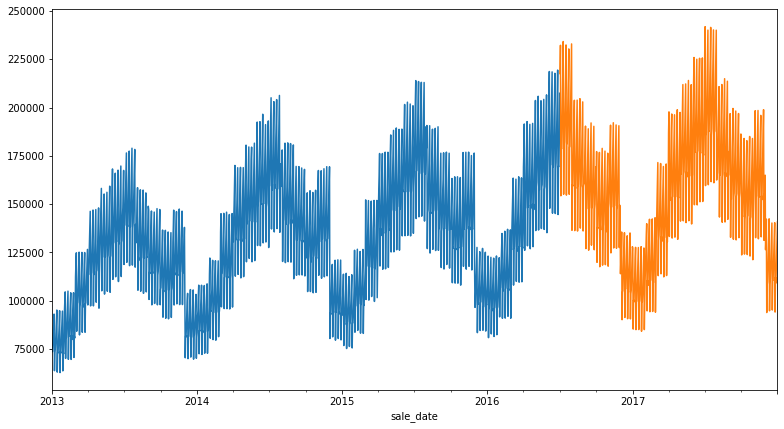

In [6]:
# Now its time to split the data
# splitting it precentage based

train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.figure(figsize=(13,7))

train = train.sales_total
test = test.sales_total

train.plot()
test.plot()


(<matplotlib.axes._subplots.AxesSubplot at 0x7f7fb6014d10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7fb6014d10>)

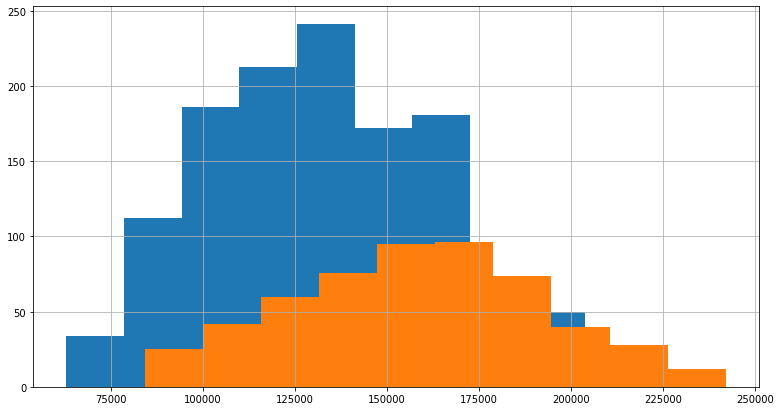

In [7]:
plt.figure(figsize=(13,7))
train.hist(), test.hist()

### 2 Week Average

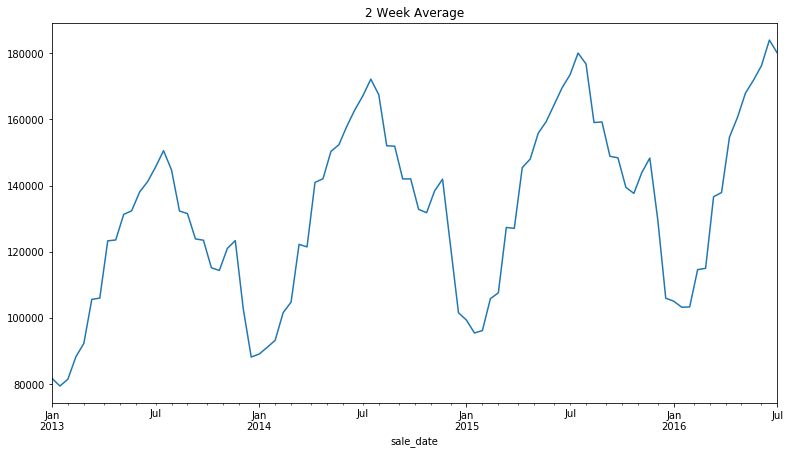

In [8]:
# looks alright... time to start plotting moving averages

y=train
#train.resample('2W').mean().plot(title='2 Week Average')
plt.figure(figsize=(13,7))
y.resample('2W').mean().plot(title='2 Week Average')

### Monthly Average


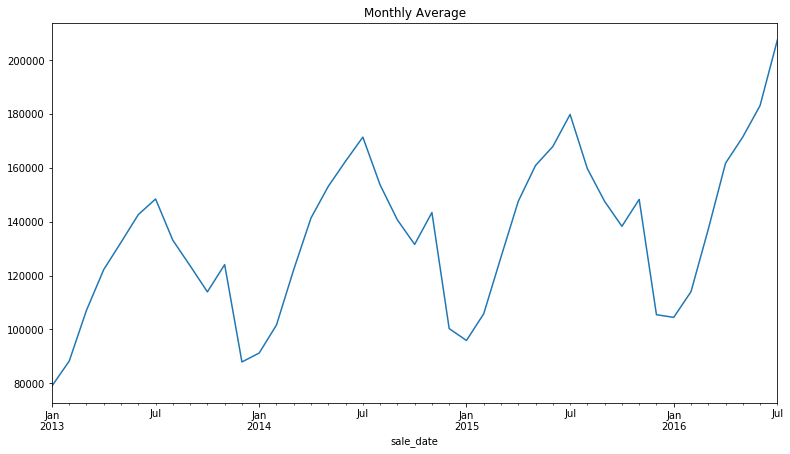

In [9]:
plt.figure(figsize=(13,7))
y.resample('M').mean().plot(title='Monthly Average')

### Min, Mean, and Max Plotted

<Figure size 936x504 with 0 Axes>

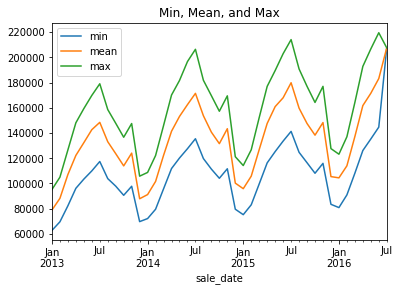

In [10]:
plt.figure(figsize=(13,7))
y.resample('M').agg(['min', 'mean', 'max']).plot(title='Min, Mean, and Max')

### Day, Week, Month, and Year Plotted (Average)

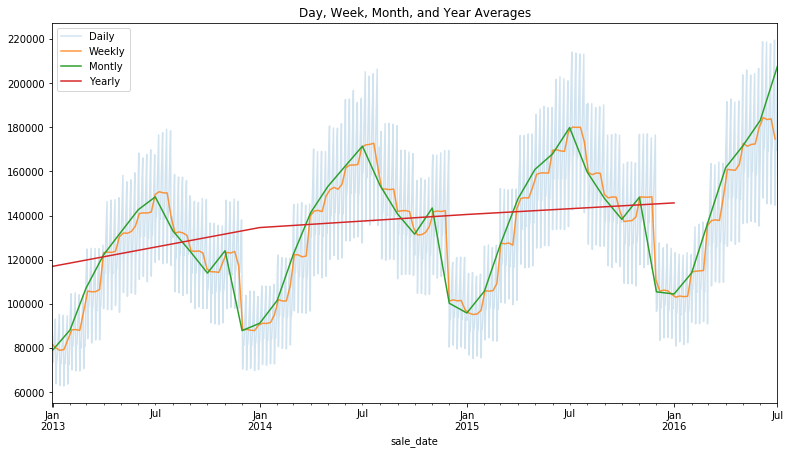

In [11]:
plt.figure(figsize=(13,7))
y.plot(alpha=.2, label='Daily', title='Day, Week, Month, and Year Averages')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

### 1, 3, and 7 Day rolling averages

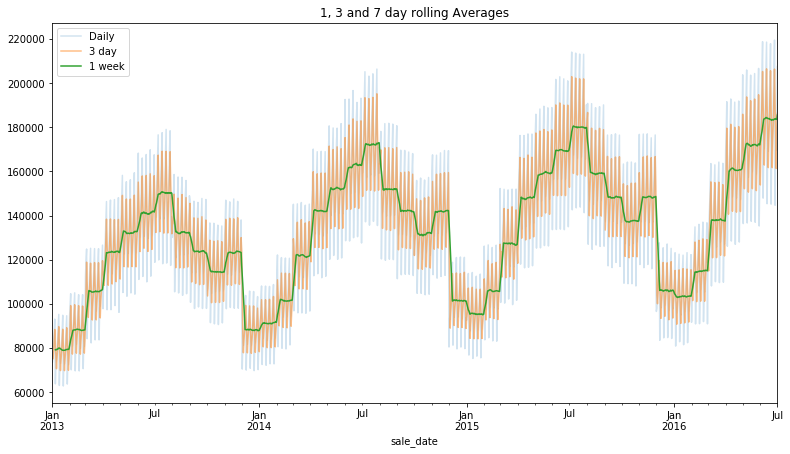

In [12]:
plt.figure(figsize=(13,7))
y.plot(alpha=.2, label='Daily', title='1, 3 and 7 day rolling Averages')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=8, label='1 week')
plt.legend()

### Visualizing change Week to Week

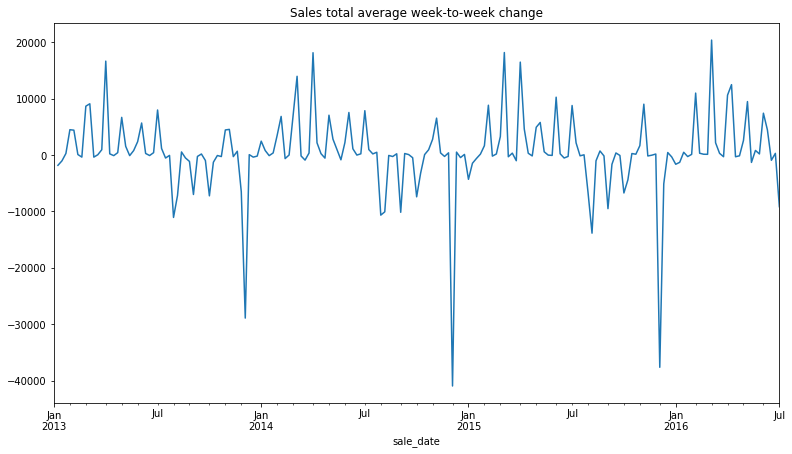

In [13]:
plt.figure(figsize=(13,7))
y.resample('W').mean().diff().plot(title='Sales total average week-to-week change')

### Visualizing change Daily

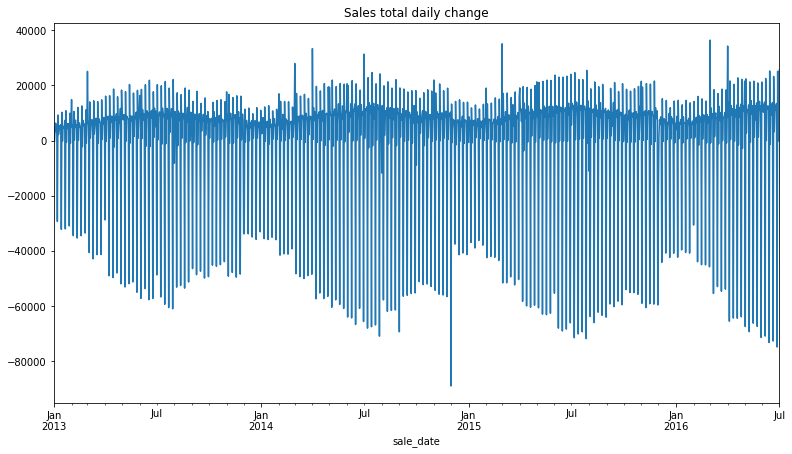

In [14]:
plt.figure(figsize=(13,7))
y.resample('D').mean().diff().plot(title='Sales total daily change')

### Visualizing change Monthly

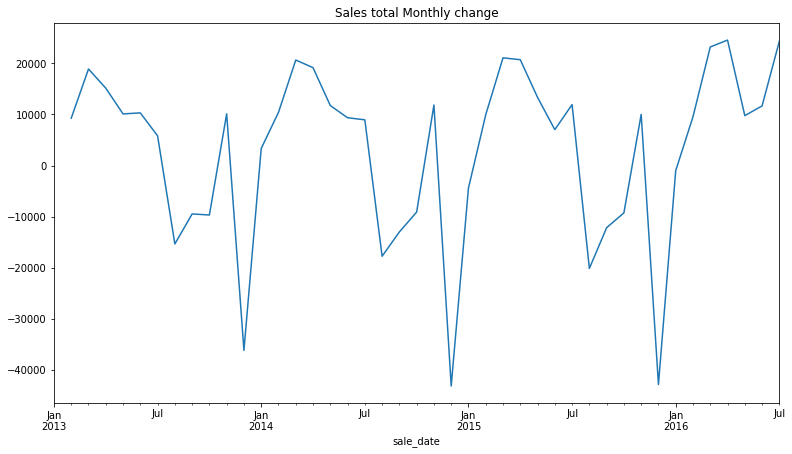

In [15]:
plt.figure(figsize=(13,7))
y.resample('M').mean().diff().plot(title='Sales total Monthly change')

### 'Tis the Season for Seasonal Plots

<Figure size 936x504 with 0 Axes>

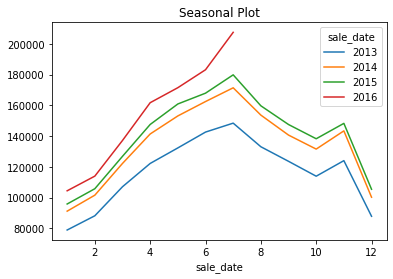

In [16]:
plt.figure(figsize=(13,7))
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

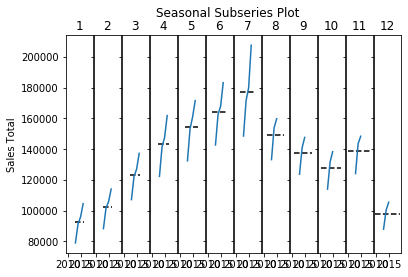

In [26]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), ls='--')
    ax.set(xlabel='')

axs[0].set(ylabel='Sales Total')
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=.05)
# fig.tight_layout()

### Lag plots

Text(0.5, 1.0, 'Lag plot with lag=1')

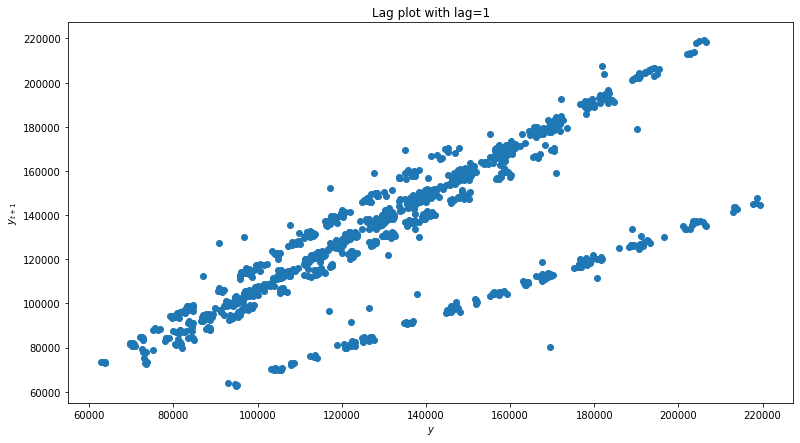

In [19]:
plt.figure(figsize=(13,7))
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

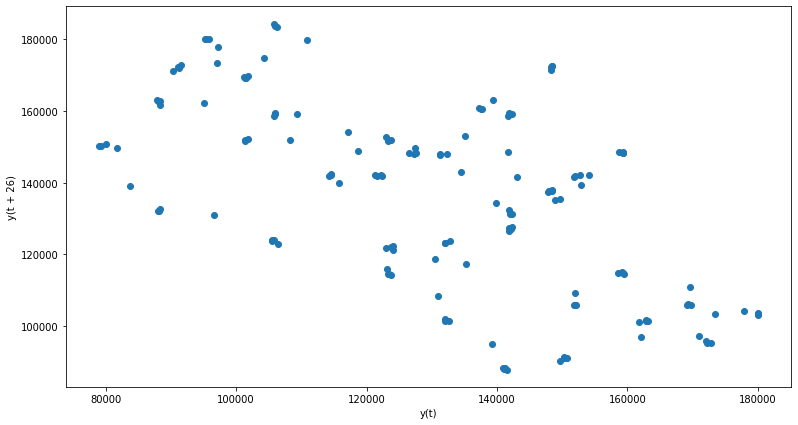

In [36]:
plt.figure(figsize=(13,7))
pd.plotting.lag_plot(y.resample('W').mean(), lag=26)

### Autocorrelation plot

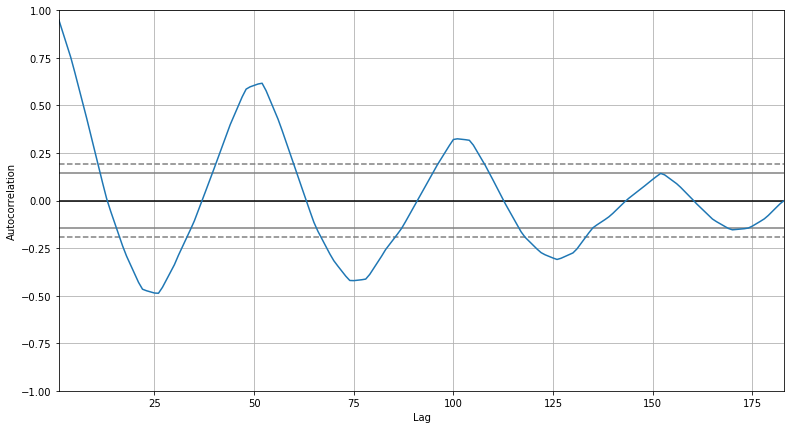

In [38]:
plt.figure(figsize=(13,7))
pd.plotting.autocorrelation_plot(y.resample('W').mean())

### Seasonal Decomposition

In [29]:
result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-01 00:00:00+00:00,73844.01,NaN,-10133.417056,NaN
2013-01-02 00:00:00+00:00,73570.58,NaN,-9983.500259,NaN
2013-01-03 00:00:00+00:00,78169.48,NaN,-1382.446605,NaN
2013-01-04 00:00:00+00:00,84467.73,79220.720000,7494.453462,-2247.443462
2013-01-05 00:00:00+00:00,87621.85,79099.384286,16295.763439,-7773.297724


<Figure size 936x504 with 0 Axes>

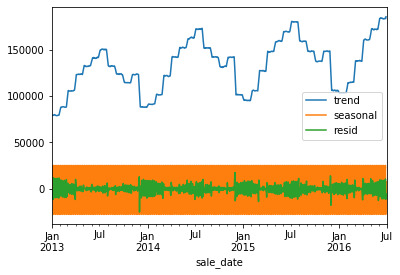

In [40]:
plt.figure(figsize=(13,7))
decomposition.iloc[:, 1:].plot()

<Figure size 936x504 with 0 Axes>

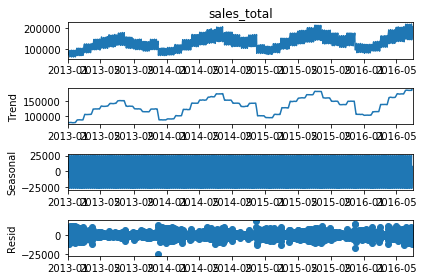

In [46]:
plt.figure(figsize=(13,7))
result.plot()
None

## Time for the OPSD Dataset